**Text Analysis Using Python -- Task1PartB**

**1. Introduction**

Text analysis is the process of classifying, sorting, extracting and analysing text-based information using computer software, in order to understand human-written texts and further relationships and pattern of information. This report conducts text analysis on dataset that is associated with the COVID-19 vaccine expressions and will try to find out the narrative and insights of the dataset. The dataset involves a variety of expressions for 181 common questions about COVID-19 vaccine. 

The columns of the dataset are as follow ():
1. Sentence - the expression written by an annotator (or taken from VIRADialogs)
2. label - the question for which the expression was written
3. label_idx - the running class index associated with this label  

**2. Importing, Loading and Describing Dataset** 

2.1. Installed required libraries using Python pip command and import the modules from the libraries. 

In [270]:
#Grpahs displayed in the notebook
%matplotlib inline 

import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

2.2. Then, I used Pandas library to read data from CSV file, which was in my google drive     

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive/Colab_Notebooks/ANLP"

ls: cannot access '/content/drive/My Drive/Colab_Notebooks/ANLP': No such file or directory


In [273]:
url = '/content/drive/My Drive/train_23.csv'
df = pd.read_csv(url)
df

,sentence,label,label_idx
0,Do booster shots have side effects worsen than...,Are booster shot side effects worse than those...,175
1,the vaccine has side effects?,Are booster shot side effects worse than those...,175
2,booster vaccine leaves worse side effects than...,Are booster shot side effects worse than those...,175
3,are reinforcements safe?,Are booster shot side effects worse than those...,175
4,because the second dose of the covid-19 vaccin...,Are booster shot side effects worse than those...,175
...,...,...,...
5164,Would you define covid for me?,what is covid?,97
5165,"hello, can you help me learn more about covid-19",what is covid?,97
5166,Explain what the Covid virus is.,what is covid?,97
5167,what was the real reason that the covid spread,what is covid?,97


2.3. I have first tried to look into summary and brief descriptive statstics of dataset, since dataset is very large.

In [274]:
# Descriptive statstics that show the average, minimum and maximum of data
df.describe()

,label_idx
count,5169.000000
mean,78.345521
std,54.090741
min,0.000000
25%,29.000000
50%,74.000000
75%,121.000000
max,180.000000


In [275]:
# General information about columns and data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   5169 non-null   object
 1   label      5169 non-null   object
 2   label_idx  5169 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [276]:
# Showing first 10 rows of dataset
df.head(10)

,sentence,label,label_idx
0,Do booster shots have side effects worsen than...,Are booster shot side effects worse than those...,175
1,the vaccine has side effects?,Are booster shot side effects worse than those...,175
2,booster vaccine leaves worse side effects than...,Are booster shot side effects worse than those...,175
3,are reinforcements safe?,Are booster shot side effects worse than those...,175
4,because the second dose of the covid-19 vaccin...,Are booster shot side effects worse than those...,175
5,really the side effects are worse after the fi...,Are booster shot side effects worse than those...,175
6,Will the second injection have fewer effects t...,Are booster shot side effects worse than those...,175
7,because the second dose of the vaccine causes ...,Are booster shot side effects worse than those...,175
8,Are the side effects of the booster worse than...,Are booster shot side effects worse than those...,175
9,Does the booster have stronger side effects?,Are booster shot side effects worse than those...,175


In [277]:
# Showing random 10 rows of dataset
df.sample(10)

,sentence,label,label_idx
2774,should i get the vaccine even if i still have ...,I'm still experiencing COVID symptoms even aft...,89
4248,What is mRNA?,What is mRNA?,76
4046,What happens if my child's school has a COVID-...,What happens if there is a COVID-19 case at my...,174
4978,"When my child gets vaccinated, will he or she ...",Will my child miss school when they get vaccin...,157
4670,the vaccine must be mandatory,Who is required to get vaccinated under the fe...,166
1418,"I don't know if I'm pregnant, should I avoid h...",Does the vaccine impact pregnancy?,50
296,If I've already had covid do I still need to g...,Can I get a second dose even after a COVID exp...,35
2205,Is the vaccine safe if I have heart problems?,I am concerned getting the vaccine because I h...,5
1338,Is the egg one of the components of the vaccine?,Does the vaccine contain eggs?,140
3493,"after what corona virus did to the world, i ca...",Tell me about the vaccine,121


**3. Word Count**

Word count is useful in text analysis to find out lengths of words and sentences

In [278]:
s = df['sentence'][4]
print(s)
len(s.split())

because the second dose of the covid-19 vaccine is higher in side effects


13

In [279]:
def word_count(sentence):
    wc = len(sentence.split())
    return wc

I created word_count function to add word_count column in dataset

In [280]:
df['word_count'] = df['sentence'].apply(word_count)
df['word_count'].describe()
df['word_count'].head(10)

0    12
1     5
2    11
3     3
4    13
5    10
6    14
7    13
8    13
9     7
Name: word_count, dtype: int64

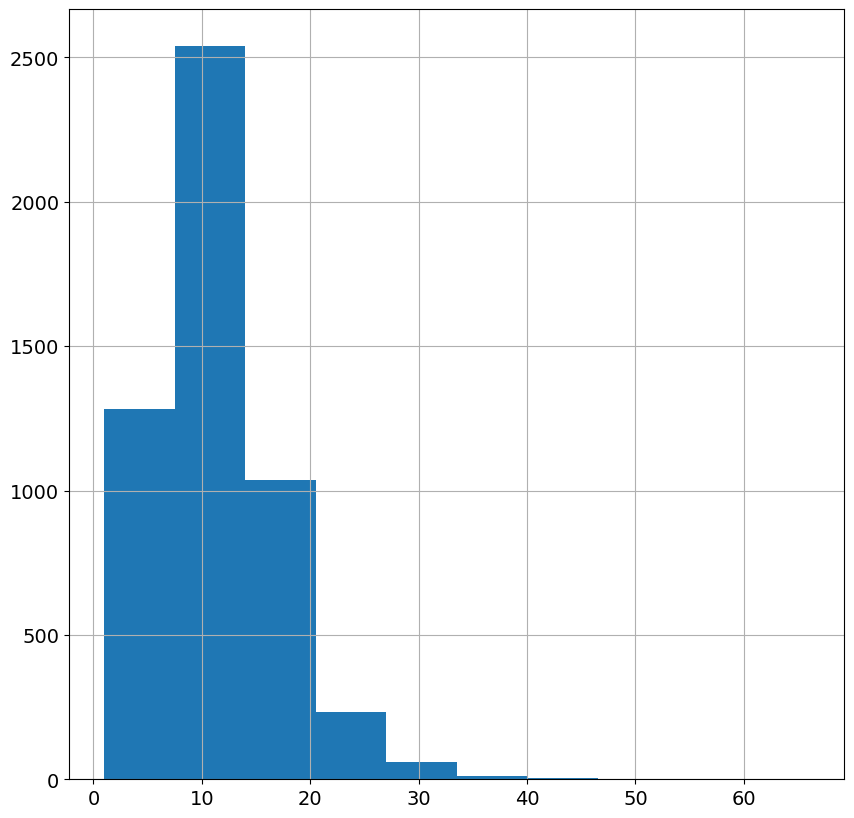

<Figure size 200x200 with 0 Axes>

In [281]:
df['word_count'].hist(bins = 10)
plt.figure(figsize=(2,2))
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

Histogram of 'word count' column clearly showed the distribution of word lengths.

In [282]:
#Showing Top 10 shortest word count
df.sort_values(by='word_count').head(10)

,sentence,label,label_idx,word_count
5125,covid-19,what is covid?,97,1
4195,whats?,What is in the vaccine?,28,1
5068,erectile disfunction?,Will the vaccine make me sterile or infertile?,86,2
613,for kids,Can children get the vaccine?,90,2
3540,its safe?,The COVID vaccine is not safe,23,2
1423,I'm prefnant,Does the vaccine impact pregnancy?,50,2
2408,its necessary?,I don't think the vaccine is necessary,12,2
5161,emergency covid?,what is covid?,97,2
3470,secondary effects,Side effects and adverse reactions worry me,22,2
172,covid-19 is dangerous?,COVID-19 is not as dangerous as they say,0,3


In [283]:
#Showing Top 10 longest word count
df.sort_values(by='word_count', ascending=False).head(10)


,sentence,label,label_idx,word_count
2929,Make sure you understand and comply with all t...,Is it okay for me to travel internationally if...,107,66
3750,The fear that a vaccine will somehow change yo...,They will put a chip/microchip to manipulate me,26,62
2448,These companies could be out to make a profit ...,I don't trust the companies producing the vacc...,13,56
4687,"For many, a nationwide return to normalcy from...",Why are COVID-19 vaccination rates slowing in ...,131,55
3159,The standard FDA approval process is like a si...,Is the vaccine FDA approved?,158,46
3493,"after what corona virus did to the world, i ca...",Tell me about the vaccine,121,43
2055,"The COVID-19 vaccine will be free for all, reg...",How much will I have to pay for the vaccine,11,40
4089,No vaccine is 100% effective so it is still th...,What if I still get infected even after receiv...,73,37
4683,As the US may miss a vaccination goal set by P...,Why are COVID-19 vaccination rates slowing in ...,131,36
5067,I was told they dont know what kind of effect ...,Will the vaccine make me sterile or infertile?,86,36


**4. Word Frequency**

Word frequency is important phase in text analysis to measure how often the specific words appear. The more frequently words appear indicate that words are more important. 

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    5169 non-null   object
 1   label       5169 non-null   object
 2   label_idx   5169 non-null   int64 
 3   word_count  5169 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


The data type of 'sentence' column is object. It needs to be changed to String data type, in order to tokenize words.

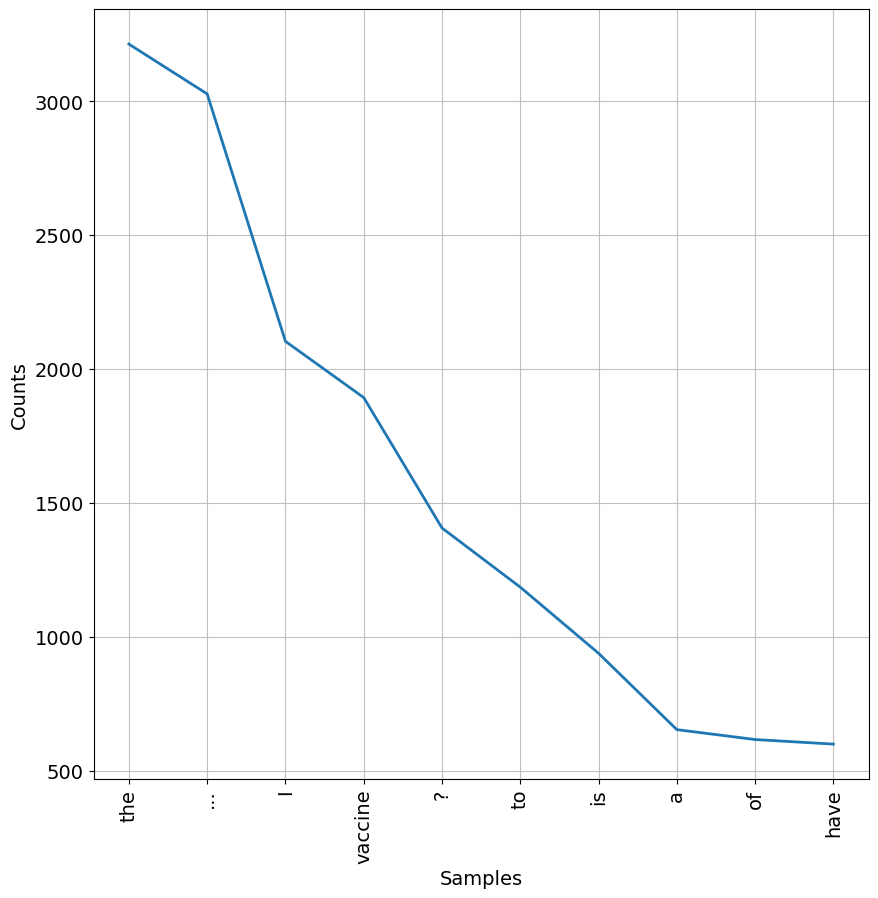

[('the', 3213), ('...', 3027), ('I', 2103), ('vaccine', 1893), ('?', 1406), ('to', 1185), ('is', 938), ('a', 653), ('of', 616), ('have', 599), ('get', 597), ('it', 498), ('be', 495), ('if', 493), ('do', 487), (',', 486), ('are', 459), ('that', 427), ('What', 400), ('Is', 397)]


In [285]:

# Change 'sentence' column data type from object to string
words = df['sentence'].to_string()
tokenized_words = word_tokenize(words)
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
plt.rcParams['figure.figsize'] = (10,10)
print(all_words.most_common(20))


Tokenized words contain stop words (i.e., unnecessary words), such as 'the', 'I' and 'to', disturbing analysis of word frequency.
Thus, stop words and other unrelated words need to be removed.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

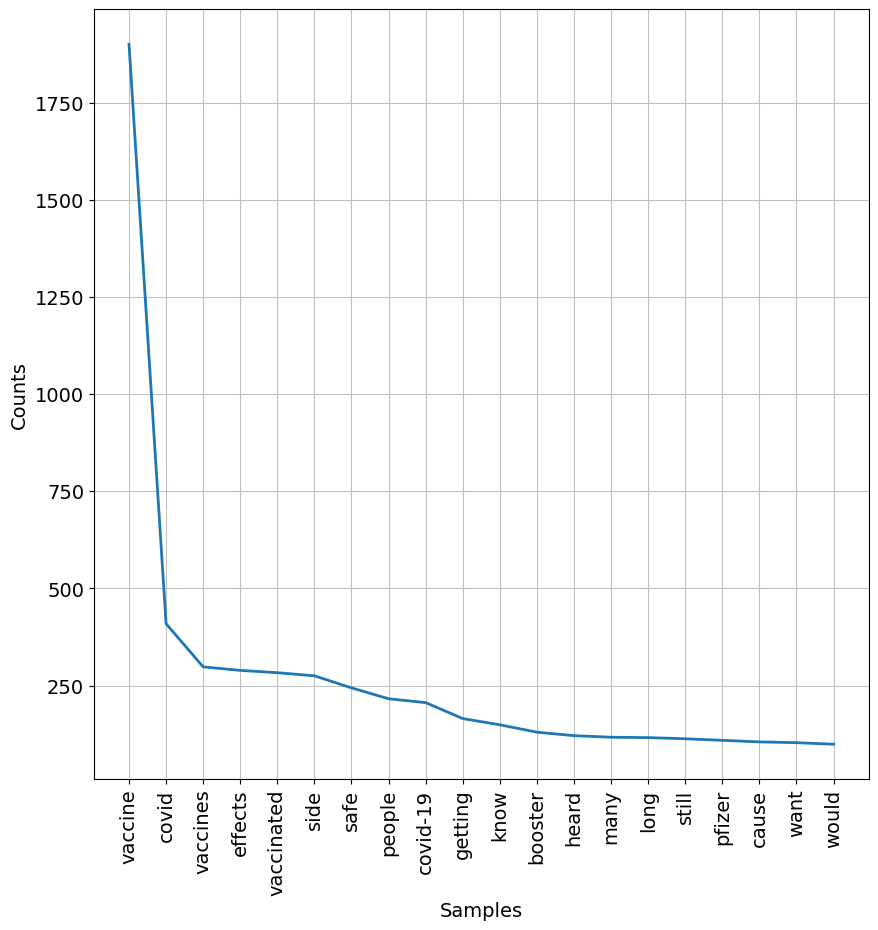

[('vaccine', 1900), ('covid', 409), ('vaccines', 298), ('effects', 289), ('vaccinated', 283), ('side', 275), ('safe', 244), ('people', 216), ('covid-19', 206), ('getting', 165), ('know', 149), ('booster', 130), ('heard', 121), ('many', 117), ('long', 116), ('still', 113), ('pfizer', 109), ('cause', 105), ('want', 103), ('would', 99)]


In [286]:

text_lower = words.lower()
# Only tokenized words that contain lower case letters, as imporatnt words are more likely to be specific nouns. 
tokenized_words=word_tokenize(text_lower)

import string
from nltk.corpus import stopwords
#stopwords "english" contains many subjective and objective words such as 'i', 'myself' and 'you'.
stop_words=stopwords.words("english")
print(stop_words)
# Adding more unnecessary words into stop_words. 
stop_words.extend(["get","need", "s", "a", "the", "I", "What", "Is", "How", "n't", "Will", "Can", "Does", "Are", "If", "The", "'ve", "'m", "j", "th", "go",])

filtered_tokens = []
for i in tokenized_words:
  if i not in stop_words:
    filtered_tokens.append(i)

# punctuations, which contain '?', '' and '!'
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append("...")
punctuations.append("?")

#Create a variable that include all filtered tokenized words. 
filtered_tokens_final=[]
for i in filtered_tokens:
    if i not in punctuations:
        filtered_tokens_final.append(i)

all_words=nltk.FreqDist(filtered_tokens_final)
all_words.plot(20);
print(all_words.most_common(20))

After filtering and cleaning data, the graph clearly shows some of the most important words (i.e., most frequently appeared), such as 'vaccine', 'covid' and 'booster', following with 'side', 'effect' and 'safe'.

In [287]:
from collections import Counter
from nltk.corpus import stopwords
top_words = dict(Counter(all_words).most_common(100))
print(top_words)

{'vaccine': 1900, 'covid': 409, 'vaccines': 298, 'effects': 289, 'vaccinated': 283, 'side': 275, 'safe': 244, 'people': 216, 'covid-19': 206, 'getting': 165, 'know': 149, 'booster': 130, 'heard': 121, 'many': 117, 'long': 116, 'still': 113, 'pfizer': 109, 'cause': 105, 'want': 103, 'would': 99, 'think': 98, 'shot': 96, 'virus': 95, 'children': 91, 'make': 82, 'take': 81, 'johnson': 79, 'new': 78, 'one': 75, 'dangerous': 74, 'tested': 74, 'effective': 71, 'variant': 70, 'work': 68, 'trust': 64, 'dose': 63, 'could': 63, 'concerned': 63, 'dont': 62, 'doses': 62, 'really': 61, 'enough': 57, 'worried': 57, 'kids': 57, 'possible': 56, 'different': 56, 'tell': 56, 'child': 53, 'mrna': 53, 'sick': 52, 'flu': 52, "'s": 52, 'sure': 50, 'information': 49, 'government': 49, 'vac': 48, 'made': 48, 'necessary': 48, 'test': 48, 'already': 47, 'effect': 47, 'even': 47, 'va': 47, 'find': 47, 'wait': 47, 'worse': 46, 'safety': 46, 'like': 46, 'difference': 46, 'give': 44, 'immune': 43, 'v': 42, 'second'

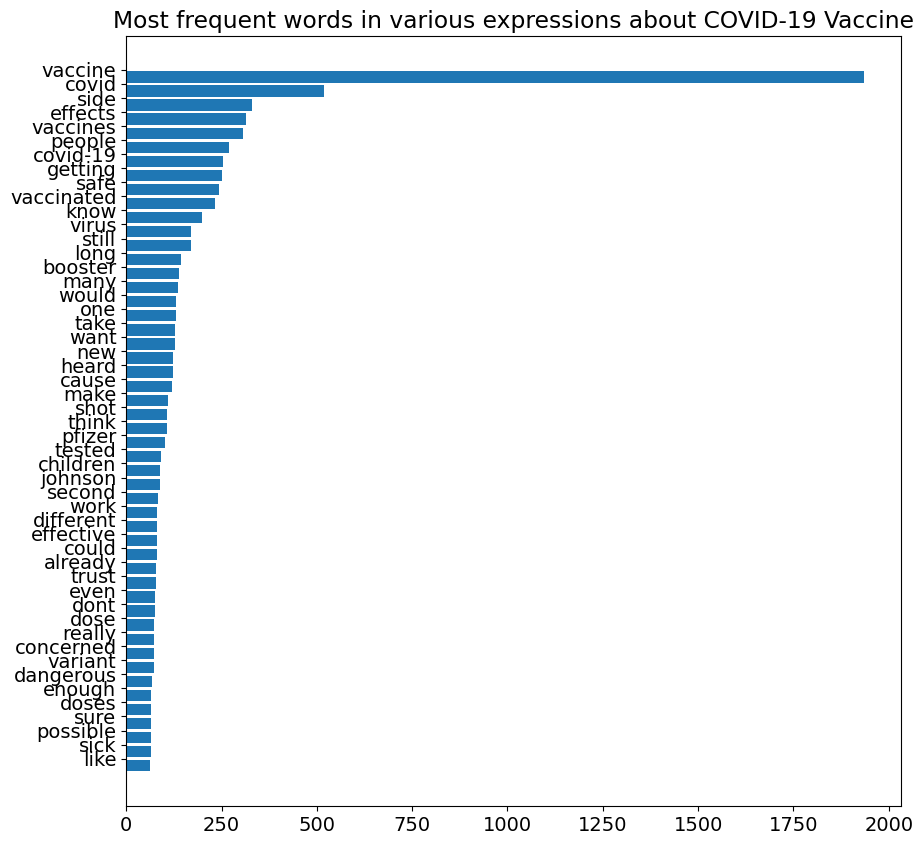

In [288]:
# Create a function to check word frequency in two columns 'sentence' and 'label'
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w in filtered_tokens_final]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()
#wordCounterFunction(df, 'sentence')
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'sentence',"Most frequent words in various expressions about COVID-19 Vaccine")
  

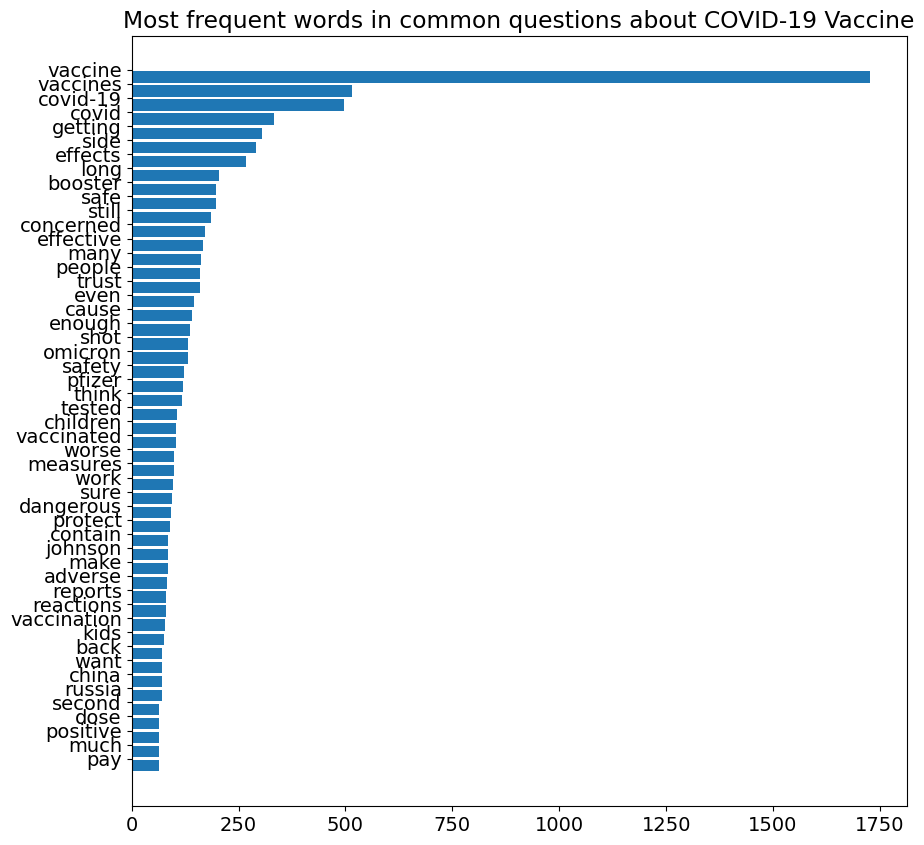

In [289]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'label',"Most frequent words in common questions about COVID-19 Vaccine")

The first bar graph showed Top 50 most frequent words in expressions and the second bar graph showed most frequent words in common questions. As predicted, 'covid', 'vaccine', and 'booster' are the most frequent words. There are two words, 'side' and 'effect' but it is highly assumed that these two words are associated each other. This will be further analysed in word association phase. Also, 'safe' is another frequent word, which is an opposite word to 'side effect', indicating that covid-19 vaccine is a controversial topic.   

In [124]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I installed 'squarify' to create a treemap of word frequency.

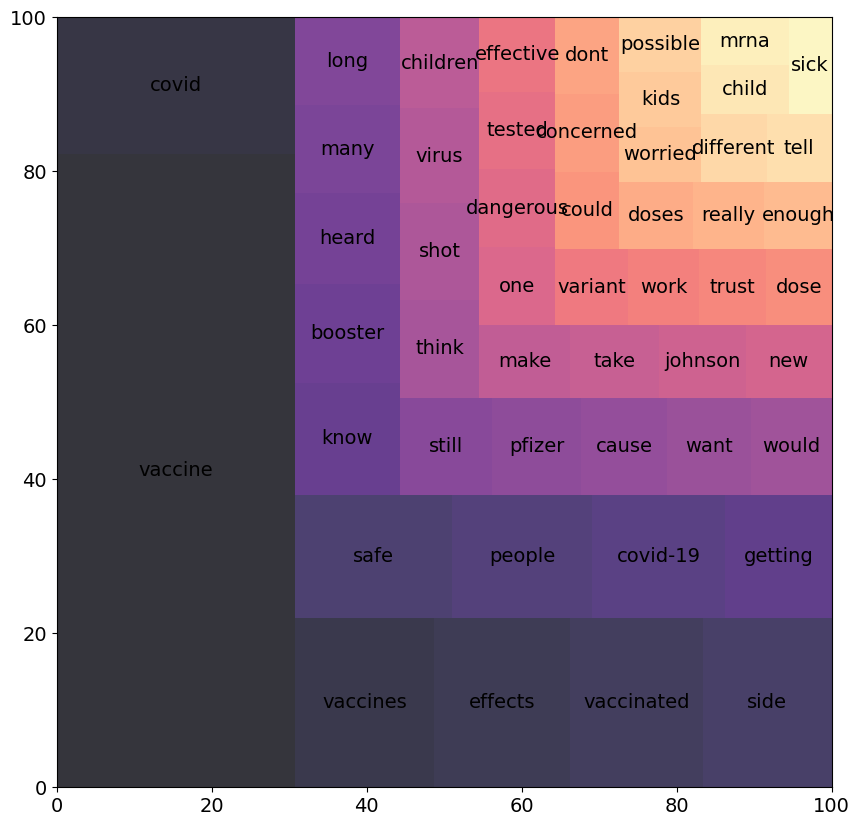

In [290]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sb

# Tree map visualization of most frequent words
top_words = dict(Counter(all_words).most_common(50))
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 14

squarify.plot(label= top_words.keys()
              ,sizes= top_words.values(),
              color = sb.color_palette("magma", 
                                     len(top_words)),
              alpha= 0.8);

A tree map is another simple and clear way to show the most frequent and important words.

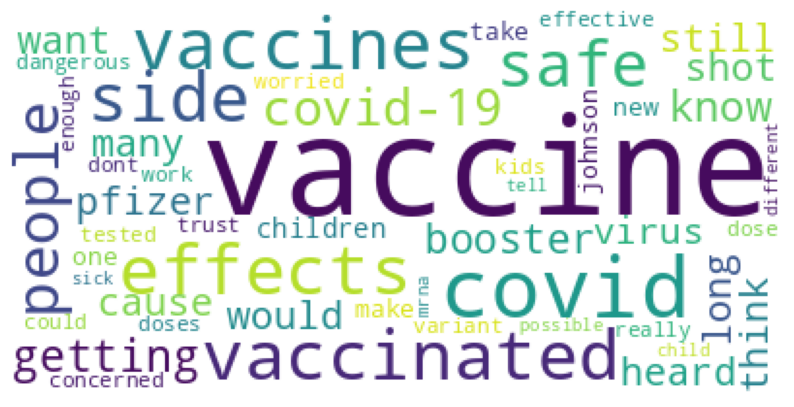

In [291]:
# WordCloud Visualization of most frequent words
from wordcloud import WordCloud 
wc = WordCloud(background_color = 'white')
wc.generate_from_frequencies(top_words)

import matplotlib.pyplot as plt
plt.imshow(wc) 
plt.axis("off")
plt.show()

Word cloud emphasize the popularity of words by making words larger and bolder.

**5. Word Association**

Word association is the process of finding a natural combination of words that are closely associated each other. Word association is an essential phase in text analysis to discover a combination of two or more important words.

In [292]:
from nltk.collocations import *
from nltk import BigramAssocMeasures
# Two words association
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens_final)

finder.nbest(bigram_measures.likelihood_ratio, 20)

[('side', 'effects'),
 ('booster', 'shot'),
 ('johnson', 'johnson'),
 ('delta', 'variant'),
 ('herd', 'immunity'),
 ('many', 'doses'),
 ('booster', 'shots'),
 ('would', 'like'),
 ('wear', 'mask'),
 ('long', 'term'),
 ('covid', '19'),
 ('south', 'african'),
 ('blood', 'clots'),
 ('many', 'people'),
 ('priority', 'groups'),
 ('pfizer', 'vaccine'),
 ('lymph', 'nodes'),
 ('convalescent', 'plasma'),
 ('fetal', 'tissue'),
 ('united', 'states')]

As mentioned above, 'side' and 'effect' were two associated words, indicating the meaning of 'side effect'. The word 'side effect' may indicate that people were concerned with side effects of COVID-19 vaccine. We can also see that 'booster' and 'shot' meaning 'booster shot'.

In [293]:
# Three words association
trigram_measures = nltk.collocations.TrigramAssocMeasures()

vaccine_filter = lambda *w: 'vaccine' not in w 
finder = TrigramCollocationFinder.from_words(filtered_tokens_final)

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
# trigrams that contain 'vaccine'
finder.apply_ngram_filter(vaccine_filter)

for i in finder.score_ngrams(trigram_measures.likelihood_ratio):
    print (i)

(('vaccine', 'side', 'effects'), 2072.0306482029687)
(('side', 'effects', 'vaccine'), 2068.4985382179825)
(('johnson', 'johnson', 'vaccine'), 439.47087237032963)
(('pfizer', 'vaccine', 'cause'), 317.22534158539236)
(('many', 'doses', 'vaccine'), 270.47018475400563)
(('covid-19', 'vaccine', 'cause'), 260.2127653304978)
(('covid', 'vaccine', 'cause'), 222.83034602512043)
(('pfizer', 'vaccine', 'safe'), 220.8445740476576)
(('vaccine', 'help', 'new'), 211.79780886890657)
(('covid', '19', 'vaccine'), 206.60623900552721)
(('vaccine', 'cause', 'autism'), 199.30668218907647)
(('johnson', 'vaccine', 'cause'), 196.75941059618395)
(('doses', 'pfizer', 'vaccine'), 193.72516883678418)
(('vaccine', 'cause', 'harm'), 185.62753534398172)
(('know', 'pfizer', 'vaccine'), 184.51944847265207)
(('vaccine', 'tested', 'community'), 181.27722758546304)
(('know', 'vaccine', 'tested'), 171.75361423057865)
(('sure', 'vaccine', 'tested'), 163.90272428448282)
(('vaccine', 'cause', 'myocarditis'), 162.2675278663509

Again, in assocation of three words, we can see 'vaccine', 'side', 'effect' most frequently occuring. 

In [294]:
# Four words association
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

finder = QuadgramCollocationFinder.from_words(filtered_tokens_final)
vaccine_filter = lambda *w: 'vaccine' not in w 


finder.apply_freq_filter(3)

finder.apply_ngram_filter(vaccine_filter)

for i in finder.score_ngrams(fourgram_measures.likelihood_ratio):
    print (i)


(('vaccine', 'side', 'effects', 'common'), 2114.522345841054)
(('johnson', 'johnson', 'vaccine', 'cause'), 586.1258081035212)
(('heard', 'johnson', 'johnson', 'vaccine'), 470.6180336803278)
(('many', 'doses', 'pfizer', 'vaccine'), 461.82848827523947)
(('pfizer', 'vaccine', 'cause', 'myocarditis'), 357.7344718114797)
(('vaccine', 'help', 'new', 'mutations'), 272.1526843008809)
(('current', 'vaccine', 'works', 'agains'), 130.2440189533217)
(('implement', 'vaccine', 'helps', 'wit'), 115.79741343657933)
(('would', 'vaccine', 'fda', 'approved'), 111.0369329073071)
(('think', 'current', 'vaccine', 'works'), 107.94894030199669)
(('multiple', 'jabs', 'vaccine', 'n'), 106.63242261125944)
(('concerned', 'vaccine', 'may', 'cause'), 96.64645057468698)


**6. K-means Clustering**

K-means clustering is the process of grouping similar types or categories of data and discovering certain patterns of data. Clustering may be useful in sorting average opinions and expressions on COVID-19 vaccines. 

In [295]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

words = df['sentence'].to_string()

#tokenized_words=word_tokenize(text_lower)

# lemmatizing words based on contexts and usage of words in sentences
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]


# Removing punctuations, which contain '?', '' and '!'
punctuations= dict((ord(punctuation), None) for punctuation in string.punctuation)


#filtered_tokens_final=[]
#for i in filtered_tokens:
    #if i not in punctuations:
        #filtered_tokens_final.append(i)

def filtered_token_final(text):
  text_lower = text.lower().translate(punctuations) # converting text into lower case and removing punctuations
  tokenized_words=word_tokenize(text_lower) # tokenizing words
  return LemTokens(tokenized_words) # Lemmatizing tokenzied words

tfidf_vectorizer = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), 
                             tokenizer = filtered_token_final, min_df=0.05, max_df=0.85)

# TfidfVectorizer
feature_vect = tfidf_vectorizer.fit_transform(df['sentence'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Before clustering, there is a process of cleaning unrelated words (i.e., punctuations and stopwords), tokenizing and lemmatizing words. Finally, I used TfidfVectorizer to convert a colletion of sorted and filtered words into a matrix of TF-IDF features. TF-IDF is useful method to order and arrange the importance of words.

In [296]:
from sklearn.cluster import KMeans

# will split data into three clusters.
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster label and centers 
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# Add 'cluster_label' column
df['cluster_label'] = cluster_label
df.sample(5)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sentence,label,label_idx,word_count,cluster_label
1773,"How long will immunity last, after having Covi...",How long am I immune from COVID-19 if I had th...,128,8,0
3838,are there reports stating that the vaccine can...,What about reports of abnormal periods due to ...,119,11,1
4721,Should I try to get a certain vaccine? What a...,Why are there different vaccines?,79,17,1
4734,I thought only weak people who needed a flu va...,Why do I need the COVID vaccine if I don't get...,80,15,2
2726,I don't think this covid vaccine is very effec...,I'm not sure it is effective enough,16,9,2


I split a collection of filtered words into three clusters using k-means.

In [297]:
df[df['cluster_label']==0].sort_values(by='sentence')

,sentence,label,label_idx,word_count,cluster_label
5109,A new study finds that the Pfizer COVID-19 vac...,Will vaccination lead to more dangerous variants?,123,15,0
5001,A permit is needed to vaccinate a child?,Will my child need my permission to get vaccin...,155,8,0
812,A volunteer in AstraZeneca's Covid-19 vaccine ...,Did a volunteer in the Oxford trial die?,125,19,0
3790,According to no side effects have been recorde...,Vaccine side effects are not getting reported,71,19,0
3026,"According to what I heard, Johnson & Johnson's...",Is the Johnson & Johnson vaccine less effectiv...,62,17,0
...,...,...,...,...,...
2683,yes i concern that because it have very second...,I'm concerned the vaccine will make me sick.,7,10,0
1137,yes mutations of the virus,Do vaccines work against the mutated strains o...,25,5,0
3550,yes they have very second effects,The COVID vaccine is not safe,23,6,0
2494,"yes, vaccines showed side effects",I don't trust vaccines if they're from China o...,33,5,0


The first cluster is associated with expressions of concerns about side-effects after getting vaccinated. There are 2767 expressions that are associated with side effects of vaccine.


In [299]:
df[df['cluster_label']==1].sort_values(by='sentence')

,sentence,label,label_idx,word_count,cluster_label
4407,A mRNA and viral vector vaccines completely di...,What is the difference between mRNA and viral ...,77,10,1
3781,A microchip is small and can be injected in me...,They will put a chip/microchip to manipulate me,26,14,1
723,A virus is a virus one vaccine should cover al...,Can other vaccines protect me from COVID-19?,31,12,1
479,"After I had the vaccine, can I meet in groups?",Can I meet in groups after I'm vaccinated?,101,10,1
862,After I've had the vaccine do I need to still ...,Do I need to continue safety measures after ge...,1,21,1
...,...,...,...,...,...
341,would I have swollen lymph nodes from the vacc...,Can I get swollen lymph nodes from the vaccine?,135,9,1
3168,would the vaccine FDA be approved,Is the vaccine FDA approved?,158,6,1
3157,would the vaccine FDA be approved soon,Is the vaccine FDA approved?,158,7,1
3162,would the vaccine FDA be approved soon this month,Is the vaccine FDA approved?,158,9,1


The second cluster may be associated with important questions and expressions prior to getting vaccinated.

In [300]:
df[df['cluster_label']==2].sort_values(by='sentence')

,sentence,label,label_idx,word_count,cluster_label
2417,A vaccine surely isn't necessary against Covid?,I don't think the vaccine is necessary,12,7,2
4961,"After being vaccinated, is it possible to test...",Will I test positive after getting the vaccine?,30,11,2
845,"After getting a vaccine, should I change the w...",Do I need to change my masking and social dist...,113,21,2
490,"After getting the Covid vaccination, is it saf...",Can I meet in groups after I'm vaccinated?,101,15,2
523,"After getting vaccinated, could I go out witho...",Can I still get COVID even after being vaccina...,41,15,2
...,...,...,...,...,...
221,why should I get the vaccine if there is no mo...,"COVID-19 is over, why should I get the vaccine?",137,13,2
681,will a newborn be immune to covid if i have be...,Can my newborn become immune to COVID-19 if I'...,136,12,2
4884,will the first dose of the vaccine mean i am s...,Will 1 dose of vaccine protect me?,83,13,2
525,will the vaccine protect me from the covid virus?,Can I still get COVID even after being vaccina...,41,9,2


The third cluster can be associated with widespread impacts of COVID-19, along with vaccine on individuals and soicety. 

In [301]:
cluster_centers = km_cluster.cluster_centers_

print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 9)
[[8.06899176e-04 1.05717131e-01 8.05435531e-02 1.31825037e-01
  6.96071669e-02 7.78060043e-02 9.60990019e-02 1.35324937e-01
  1.24473589e-01]
 [0.00000000e+00 2.63901512e-03 2.21910887e-03 8.54133454e-04
  1.35095987e-03 1.33631322e-03 8.87352662e-04 0.00000000e+00
  9.95577154e-01]
 [8.18699043e-01 1.19116113e-03 5.74021952e-02 3.05754610e-02
  5.00527056e-02 5.06764991e-02 2.24475382e-02 7.36074682e-02
  2.24755400e-01]]


**7. Sentiment Analysis**

Sentiment analysis is the process of determining whether words are positive, negatie or neutral. By doing so, it may help to understand various expressions and perspectives on COVID-19 vaccine. 

In [302]:
import nltk
from textblob import TextBlob

blob = ' '.join(str(e) for e in filtered_tokens_final)
blob = TextBlob(blob)
blob.sentiment



Sentiment(polarity=0.10892172634584407, subjectivity=0.5135549219716558)

Filtered_tokens_final is a collection of filtered and cleaned words, already conducted in previous stage (3. Word Frequency). 
I first tried to use TextBlob module, which shows sentiment polarity (range [-1.0, 1.0]) and subjectivity of words (range [0.0, 1.0]). The average sentiment score of words seems neutral. I subsequently conduct one more sentiment analysis technique.  

In [303]:
from afinn import Afinn
import numpy as np
import pandas as pd
afn = Afinn()
all_words=nltk.FreqDist(filtered_tokens_final)

scores = [afn.score(i) for i in filtered_tokens_final]
sentiment = ['positive' if score > 0 else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]

mean = np.array(scores)
np.mean(mean)



df1 = pd.DataFrame()
df1['words'] = filtered_tokens_final
df1['scores'] = scores
df1['sentiment'] = sentiment
print("Average of sentiment scores : ", np.mean(mean))
df1.sample(30)






Average of sentiment scores :  -0.01891637421895061


,words,scores,sentiment
794,effects,0.0,neutral
8709,b,0.0,neutral
1103,225,0.0,neutral
5412,b,0.0,neutral
6958,cant,0.0,neutral
12628,2763,0.0,neutral
16263,yes,1.0,positive
5066,limit,0.0,neutral
13753,delta,0.0,neutral
8303,told,0.0,neutral


I used afinn module to double check sentiment of words. The average sentiment score using afinn (range of [-5 and 5]) was -0.01891637421895061, which is slightly negative but almost neutral. 

Overall, it is difficult to determine sentiment of primary words used in this expression. Perhaps, many of words, such as covid-19 and vaccine, were difficult to be determined as positive or negative. 

**8. Discussion and Conclusion**

This report conducted text analysis using various techniques, including word count, word frequency, word association, k-mean clustering and sentiment analysis. In the phase of word frequency, 'covid-19', 'vaccine', 'booster', 'side effect' and 'safe' were most frequent words. 'side effect' may reveal social concerns and negative perspective on covid-19 vaccine. On the other hand, 'safe' indicates a positive perspective on vaccine. 

Furthermore, word association confirmed that 'side' and 'effect' are one word and 'side effect' were frequently associated with the word 'vaccine' in more than two words assoication. Also, K-mean clustering also confirmed that at least 2767 expressions were related to concerns and side effects of vaccine. 

Lastly, it was difficult to measure sentiment of primary words since many of primary words were mostly neutral. However, if advanced sentiment analysis, using deep learning, is performed, there will be more likely that primary words are negative. 

Overall, 'side effect' is one of the main words, indicating negative perspectives of COVID-19 vaccine.

**9. Reference**

Benchmark Data and Evaluation Framework for Intent Discovery Around COVID-19 Vaccine Hesitancy.
Shai Gretz, Assaf Toledo, Roni Friedman, Dan Lahav, Rose Weeks, Naor Bar-Zeev, João Sedoc, Pooja Sangha, Yoav Katz, Noam Slonim
arXiv, 2022

Chaudhary, M. (2021, December 14). TF-IDF Vectorizer scikit-learn - Mukesh Chaudhary - Medium. Medium. https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a#:~:text=In%20TfidfVectorizer%20we%20consider%20overall,they%20appear%20in%20the%20documents.

GeeksforGeeks. (2020, November 26). Change plot size in Matplotlib   Python. https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/

GeeksforGeeks. (2023, February 17). Python   Sentiment Analysis using Affin. https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/